# Exploring Data with Python Real World Data



         Name  StudyHours  Grade  Lulus
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\restu\AppData\Local\Temp\ipykernel_5332\1044132069.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


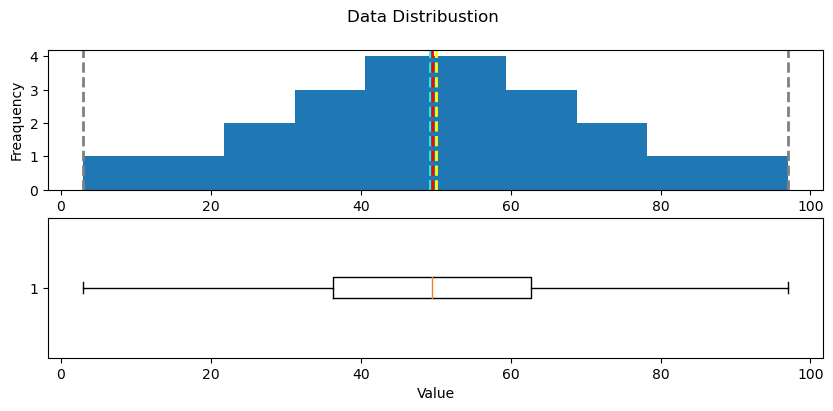

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a text file
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
df_students = pd.read_csv(url, delimiter=',', header='infer')

# Remove any rows with missing value
df_students = df_students.dropna(axis=0, how='any')

# Calculate who pased, assumsing '60' is the grade to pass
passes = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the pandas dataframe
df_students = pd.concat([df_students, passes.rename("Lulus")], axis=1)

# Print the result out into this notebook
print(df_students)

# Create a function that we can re-use
def show_distribution(var_data):
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize= (10,4))
    
    # Plot Histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Freaquency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth = 2)
    
    # Plot the boxpot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle('Data Distribustion')
    
    # Show the Figure
    fig.show()

show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\restu\AppData\Local\Temp\ipykernel_5332\1044132069.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


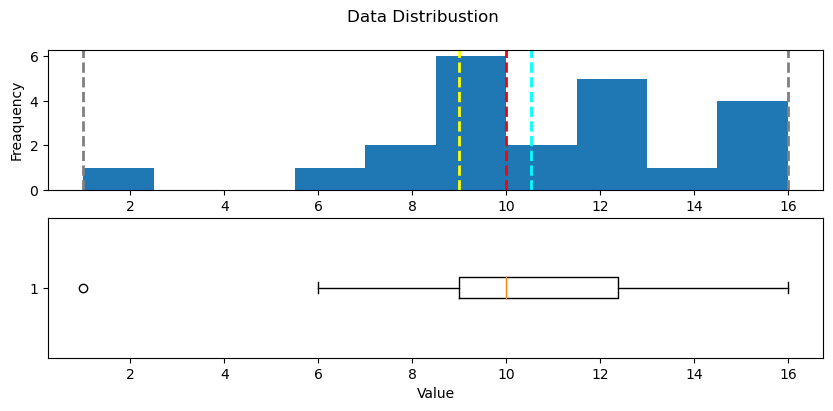

In [20]:
# Get the Variable to eximine
col = df_students['StudyHours']

# Call the Function 
show_distribution(col)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\restu\AppData\Local\Temp\ipykernel_5332\1044132069.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


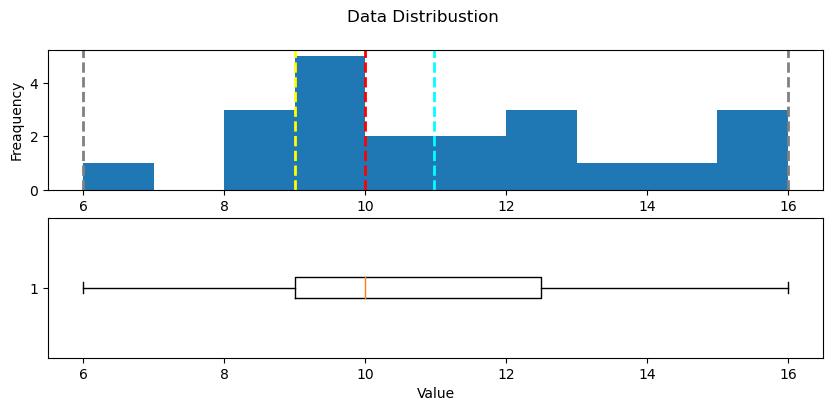

In [23]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\restu\AppData\Local\Temp\ipykernel_5332\1044132069.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


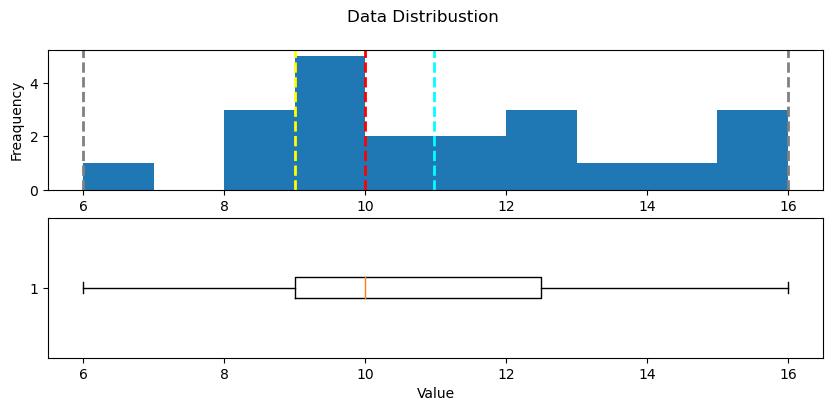

In [29]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)

# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']

# Call the function
show_distribution(col)

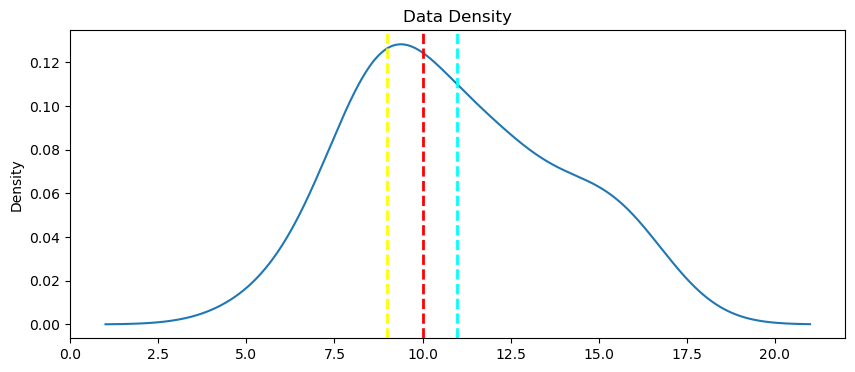

In [32]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

In [34]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance 12.16
 - Std.Dev: 3.49


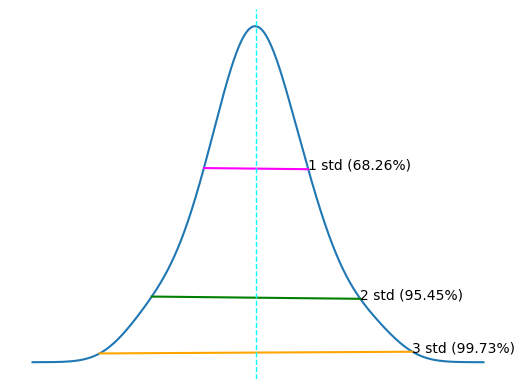

In [35]:
import scipy.stats as stats

# Grade the grade column
col = df_students['Grade']

# Get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdevs
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3, y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

In [36]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


### Comparing Data

In [38]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Lulus
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<AxesSubplot:title={'center':'StudyHours'}, xlabel='Lulus'>

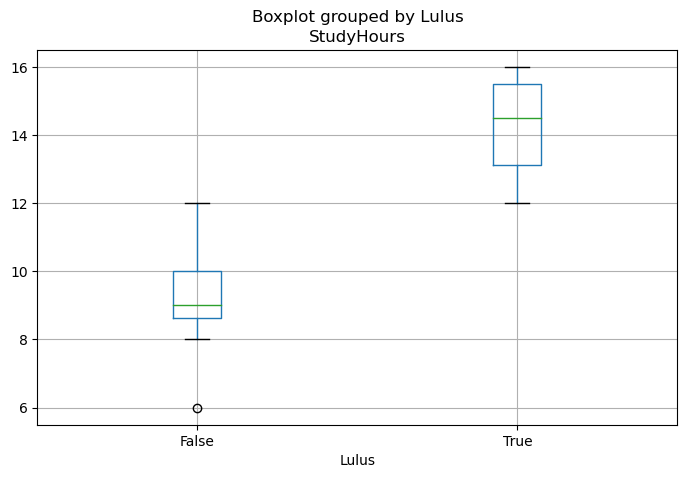

In [41]:
df_sample.boxplot(column='StudyHours', by='Lulus', figsize=(8,5))

<AxesSubplot:xlabel='Name'>

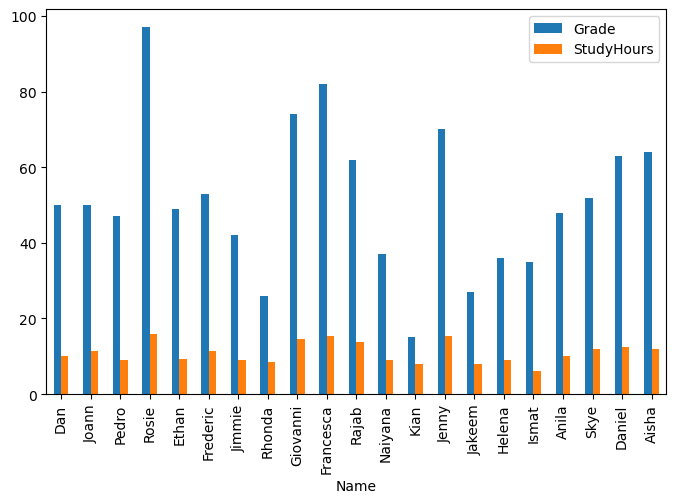

In [42]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

<AxesSubplot:xlabel='Name'>

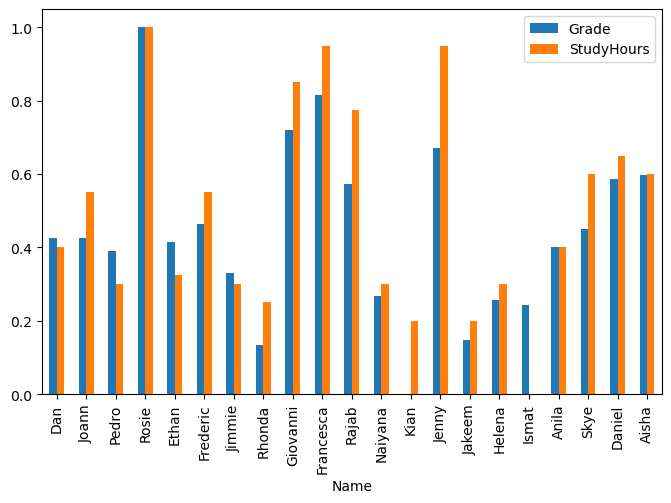

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [46]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

<AxesSubplot:title={'center':'StudyTime vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

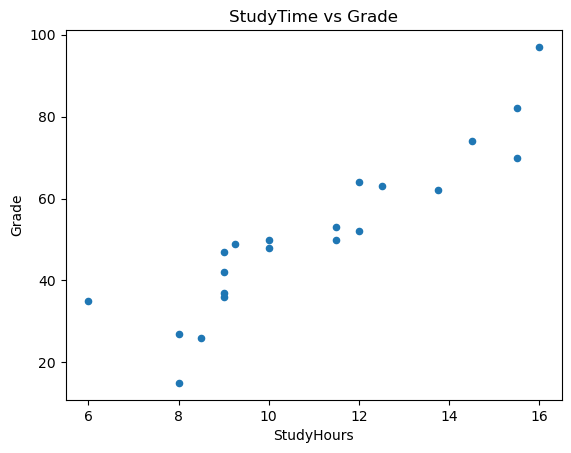

In [49]:
# Create a scatter plot
df_sample.plot.scatter(title='StudyTime vs Grade', x='StudyHours', y='Grade')

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


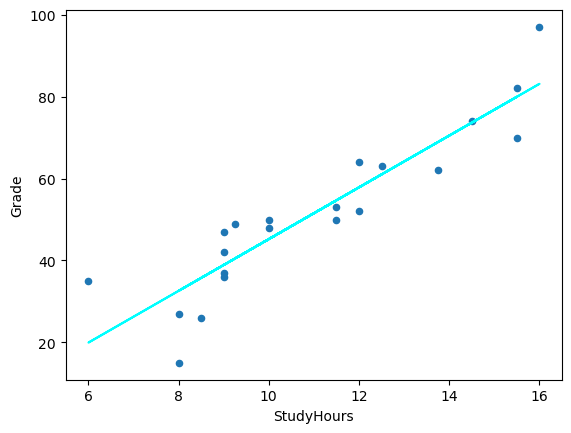

In [50]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [51]:
# Tampilkan nilai x, y asli, nilai f(x), dan kesalahan
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


In [52]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


## Summary

Here we've looked at:

-What an outlier is and how to remove them <br>
-How data can be skewed <br>
-How to look at the spread of data <br>
-Basic ways to compare variables, such as grades and study time <br>